In [1]:
pip install opencv-python "numpy<2" matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def gamma_correction(image, gamma, c=1.0):
   
    r = image.astype(np.float32) / 255.0

    s = c * np.power(r, gamma)

    output = np.uint8(np.clip(s * 255, 0, 255))
    return output

In [8]:
image = cv2.imread('/Users/230108/Downloads/sunset.jpg', 0)

In [9]:
    output1 = gamma_correction(image, 1, 0.5)
    output2 = gamma_correction(image, 1, 2)

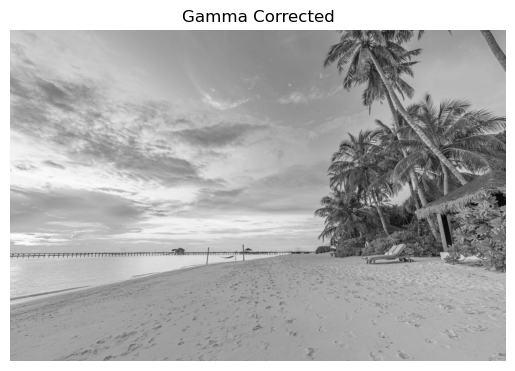

In [10]:
plt.imshow(output1,cmap='gray')
plt.title("Gamma Corrected")
plt.axis('off')
plt.show()

In [11]:
def contrast_stretching(img_in, s_min, s_max):
    r_min = np.min(img_in)
    r_max = np.max(img_in)
    
    img_out = ((s_max - s_min) / (r_max - r_min + 1e-5)) * (img_in - r_min) + s_min
    
    return np.uint8(np.clip(img_out, 0, 255))

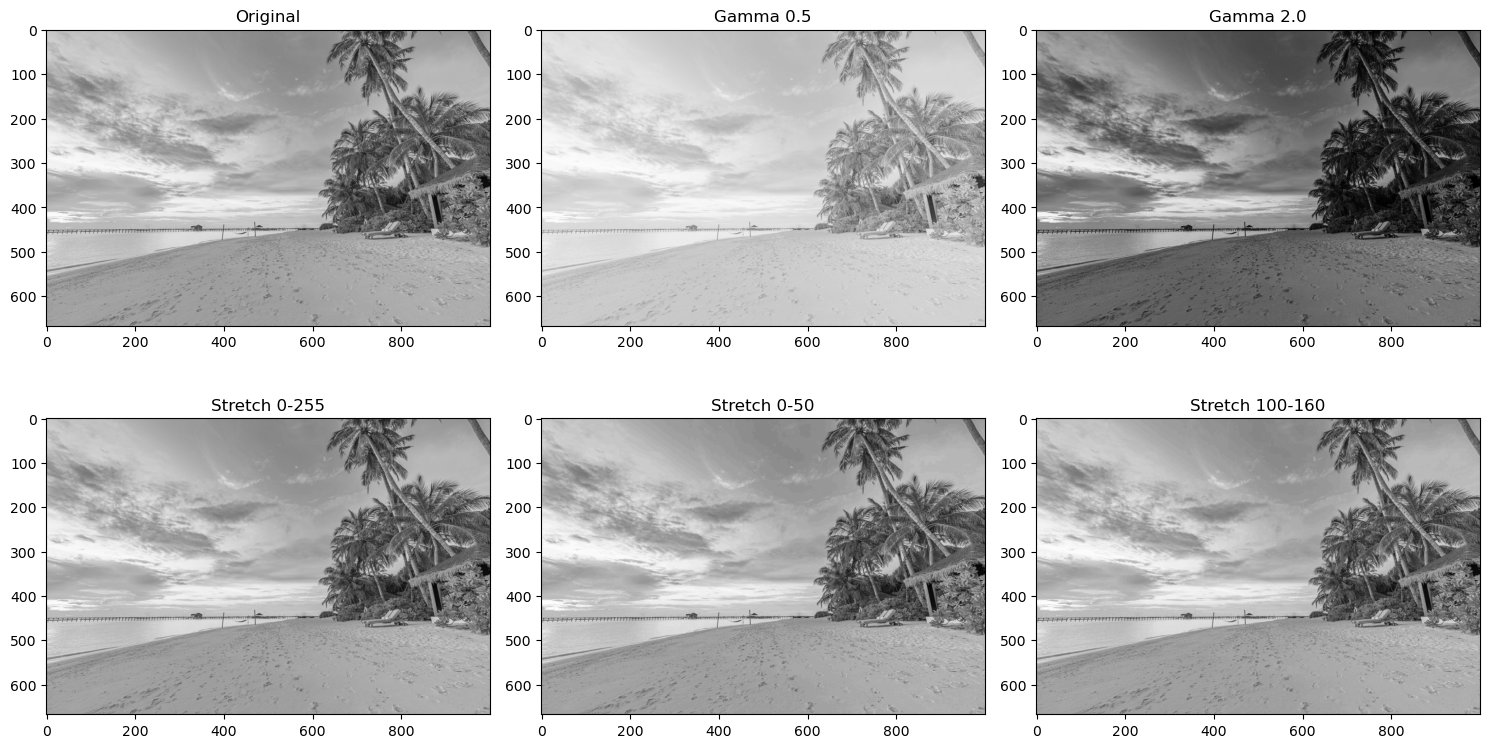

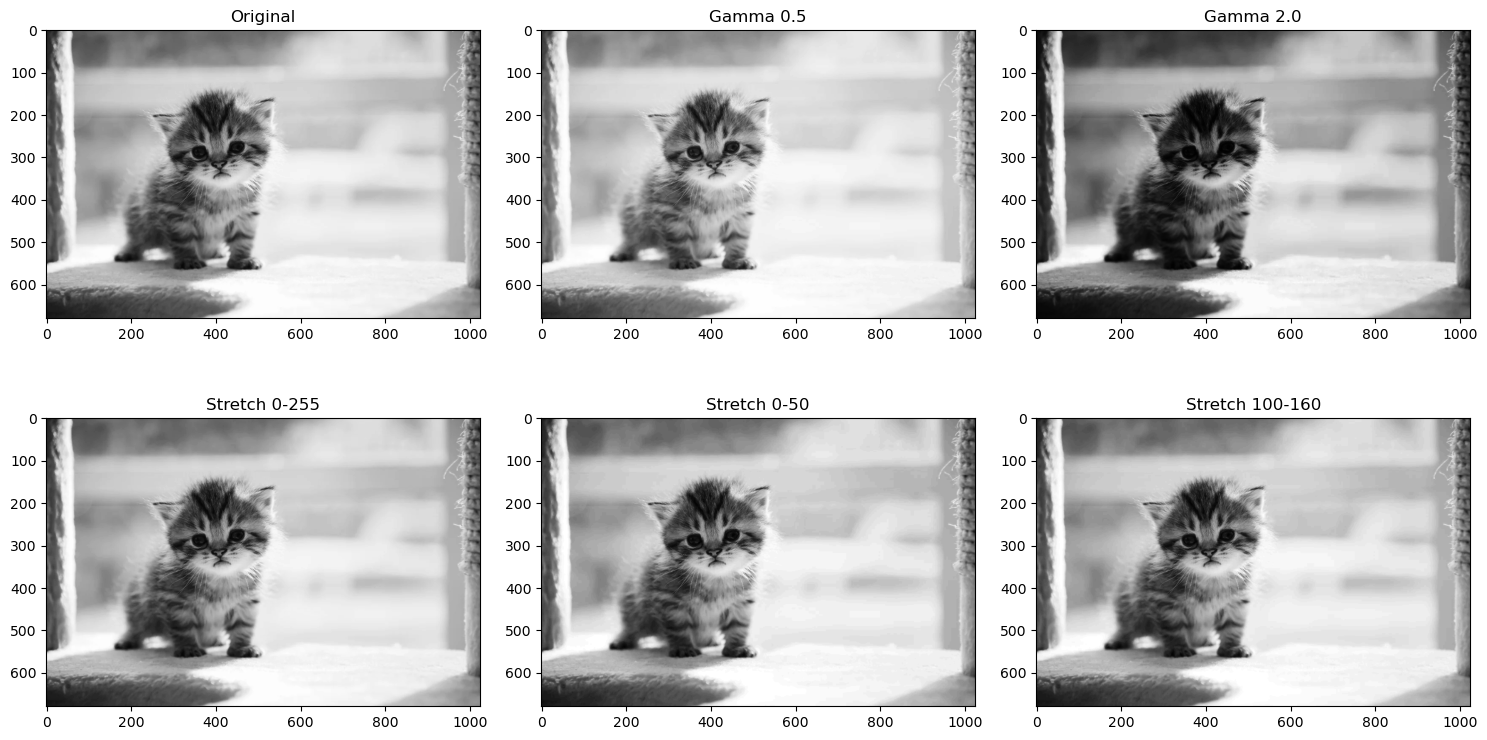

In [14]:
image_paths = ['/Users/230108/Downloads/sunset.jpg','/Users/230108/Downloads/cat.webp']

for path in image_paths:
    img = cv2.imread(path, 0)
    
    if img is None:
        print(f"Fayl topilmadi: {path}")
        continue

    bright = gamma_correction(img, 0.5)
    dark = gamma_correction(img, 2.0)
    
    stretched_full = contrast_stretching(img, 0, 255)
    
    cs_0_50 = contrast_stretching(img, 0, 50)
    cs_100_160 = contrast_stretching(img, 100, 160)

    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original')
    plt.subplot(2, 3, 2); plt.imshow(bright, cmap='gray'); plt.title('Gamma 0.5')
    plt.subplot(2, 3, 3); plt.imshow(dark, cmap='gray'); plt.title('Gamma 2.0')
    plt.subplot(2, 3, 4); plt.imshow(stretched_full, cmap='gray'); plt.title('Stretch 0-255')
    plt.subplot(2, 3, 5); plt.imshow(cs_0_50, cmap='gray'); plt.title('Stretch 0-50')
    plt.subplot(2, 3, 6); plt.imshow(cs_100_160, cmap='gray'); plt.title('Stretch 100-160')
    
    plt.tight_layout()
    plt.show()